# PCA and TSNE Analysis of Pooled Dataset
### Allison Glynn
### April 6 2024

PCA and TSNE analyses of pooled dataset

In [119]:
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

from sklearn import tree
import pydotplus
from IPython.display import Image
import mpl_axes_aligner

from sklearn.impute import SimpleImputer

In [120]:
diagnoses = ['ASD', 'AD', 'PD', 'MS']

color_map = {'AD': '#666666',
             'ASD':'#F0027F',
             'MS': '#FDC086',
             'PD': '#7FC97F'}

# load in data:

df = pd.read_csv('../Data/20440_cleaned_data.csv')

for diag in diagnoses:
    for feature in df.columns:
        drop = 0
        for val in df[feature].loc[df['Diagnosis'] == diag]:
            if val != 0:
                drop +=1
        if drop == 0:
            df = df.drop([feature], axis=1)

# This is for trimming out a certain amount of a diagnosis if we want more equal sizes
# for diag in diagnoses:
#     indexdiag = df[df['Diagnosis'] == diag].index
#     df = df.drop(indexdiag[50:])

#  This is for dropping certain diagnoses for troubleshooting
# for diag in diagnoses:
#     indexdiag = df[df['Diagnosis'] == diag].index
#     df = df.drop(indexdiag)

# For dropping diagnosis column so we can feed data in:
data = df.drop(['Diagnosis'], axis=1) # data without diagnosis column
data = data.drop(['Unknown'], axis=1)

# make a list of diagnoses:
diagnosis = df["Diagnosis"]

Imputation, if necessary:

In [121]:
# imp_mean = SimpleImputer(missing_values=0, strategy='mean')
# imp_mean.fit(data)
# out = imp_mean.transform(data)
# columns = data.columns
# data = pd.DataFrame(out, columns=columns)

Standardization

In [122]:
from sklearn import preprocessing
data_copy = data
columns = data_copy.columns
scaler = preprocessing.StandardScaler().fit(data_copy)
data = pd.DataFrame(scaler.transform(data_copy), columns=columns)

Show data:

In [123]:
data

,Alistipes,Bacteroides,Bifidobacterium,Butyricicoccus,Clostridium,Dorea,Eggerthella,Faecalibacterium,Prevotella,Ruminococcus,...,Roseburia,Rothia,Odoribacter,Lactobacillus,Collinsella,Actinomyces,Coprobacillus,Parabacteroides,Anaerotruncus,Butyrivibrio
0,-0.279743,-0.274721,-0.494535,2.908757,-0.264010,-0.310020,0.715602,-0.282054,6.107520,0.377310,...,-0.792429,-0.153732,-0.503688,-0.097709,-0.404439,-0.243768,-0.226683,-0.528405,-0.288621,-0.168856
1,-0.271075,-0.240027,-0.364661,2.347088,2.647833,-0.364756,-0.422635,-0.423088,-0.254259,0.454707,...,2.073094,-0.153732,-0.503688,-0.097709,-0.404439,-0.243768,-0.226683,-0.528405,-0.288621,-0.168856
2,-0.567960,2.190950,-0.499382,1.865787,1.668238,-0.240674,-0.422635,-0.603423,-0.254259,0.263981,...,0.815632,0.519957,-0.503688,-0.097709,-0.404439,-0.243768,-0.226683,-0.528405,-0.288621,-0.168856
3,-0.427820,0.098596,-0.509312,2.718895,0.581342,0.179933,0.412660,1.490248,1.805702,-0.195309,...,-0.792429,-0.153732,0.295397,-0.097709,-0.404439,-0.243768,-0.226683,-0.528405,-0.288621,-0.168856
4,-0.492406,1.609645,-0.283909,1.191105,1.091819,0.427007,-0.422635,-0.479528,-0.254259,0.033547,...,0.240791,-0.153732,-0.503688,-0.097709,-0.404439,-0.243768,-0.226683,-0.528405,-0.288621,-0.168856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,-0.567960,-0.872361,-0.468789,-0.405468,-0.397515,0.337731,0.131916,0.414920,-0.254259,-0.495973,...,0.772182,-0.153732,-0.503688,-0.060687,-0.404439,0.475195,-0.226683,-0.528405,-0.288621,-0.168856
389,-0.567960,-0.868283,0.520033,-0.405468,0.613997,-0.417634,0.956084,-0.719067,-0.254259,-0.253432,...,-0.702725,-0.153732,-0.503688,0.036309,6.721598,-0.243768,1.179211,-0.528405,-0.226917,-0.168856
390,-0.567960,-0.856151,-0.548851,-0.405468,-0.529913,-0.503255,0.289941,-0.293625,-0.254259,-0.522148,...,-0.695102,-0.153732,-0.503688,-0.075462,-0.025065,0.294220,0.021187,-0.528405,-0.288621,-0.168856
391,-0.567960,-0.850705,-0.319388,-0.405468,0.443873,1.430648,6.665385,-0.621448,-0.254259,-0.727475,...,-0.617740,-0.153732,-0.503688,-0.012787,-0.404439,-0.243768,15.460568,-0.528405,-0.288621,-0.168856


## PCA of pooled dataset

**Now we perform PCA:**

In [124]:
# prep PCA output dataframe:
columns_list = []

**Run PCA:**

In [125]:
pca = PCA(n_components=.95)
out = pca.fit_transform(data)
for i in range(len(out[0])):
    columns_list.append("PC" + str(i + 1))
    
out_df = pd.DataFrame(out, columns=columns_list)
loadings_pool = pd.DataFrame(pca.components_, columns=data.columns, index=out_df.columns)

**Visualize variance ratio explained by each component:**

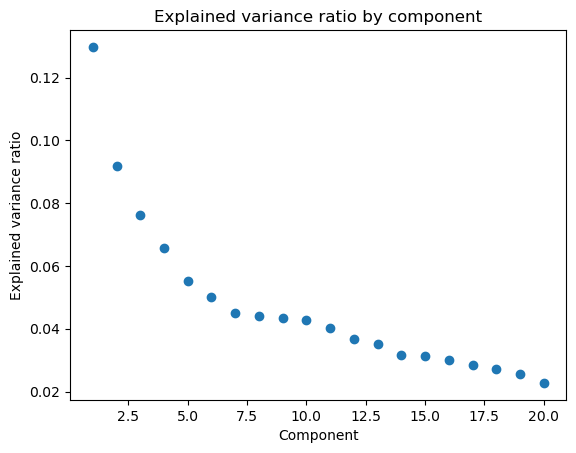

In [126]:
pc = np.linspace(1, len(columns_list), len(columns_list))
var_ratio = pca.explained_variance_ratio_
plt.scatter(pc, var_ratio)
plt.title('Explained variance ratio by component')
plt.xlabel('Component')
plt.ylabel('Explained variance ratio');

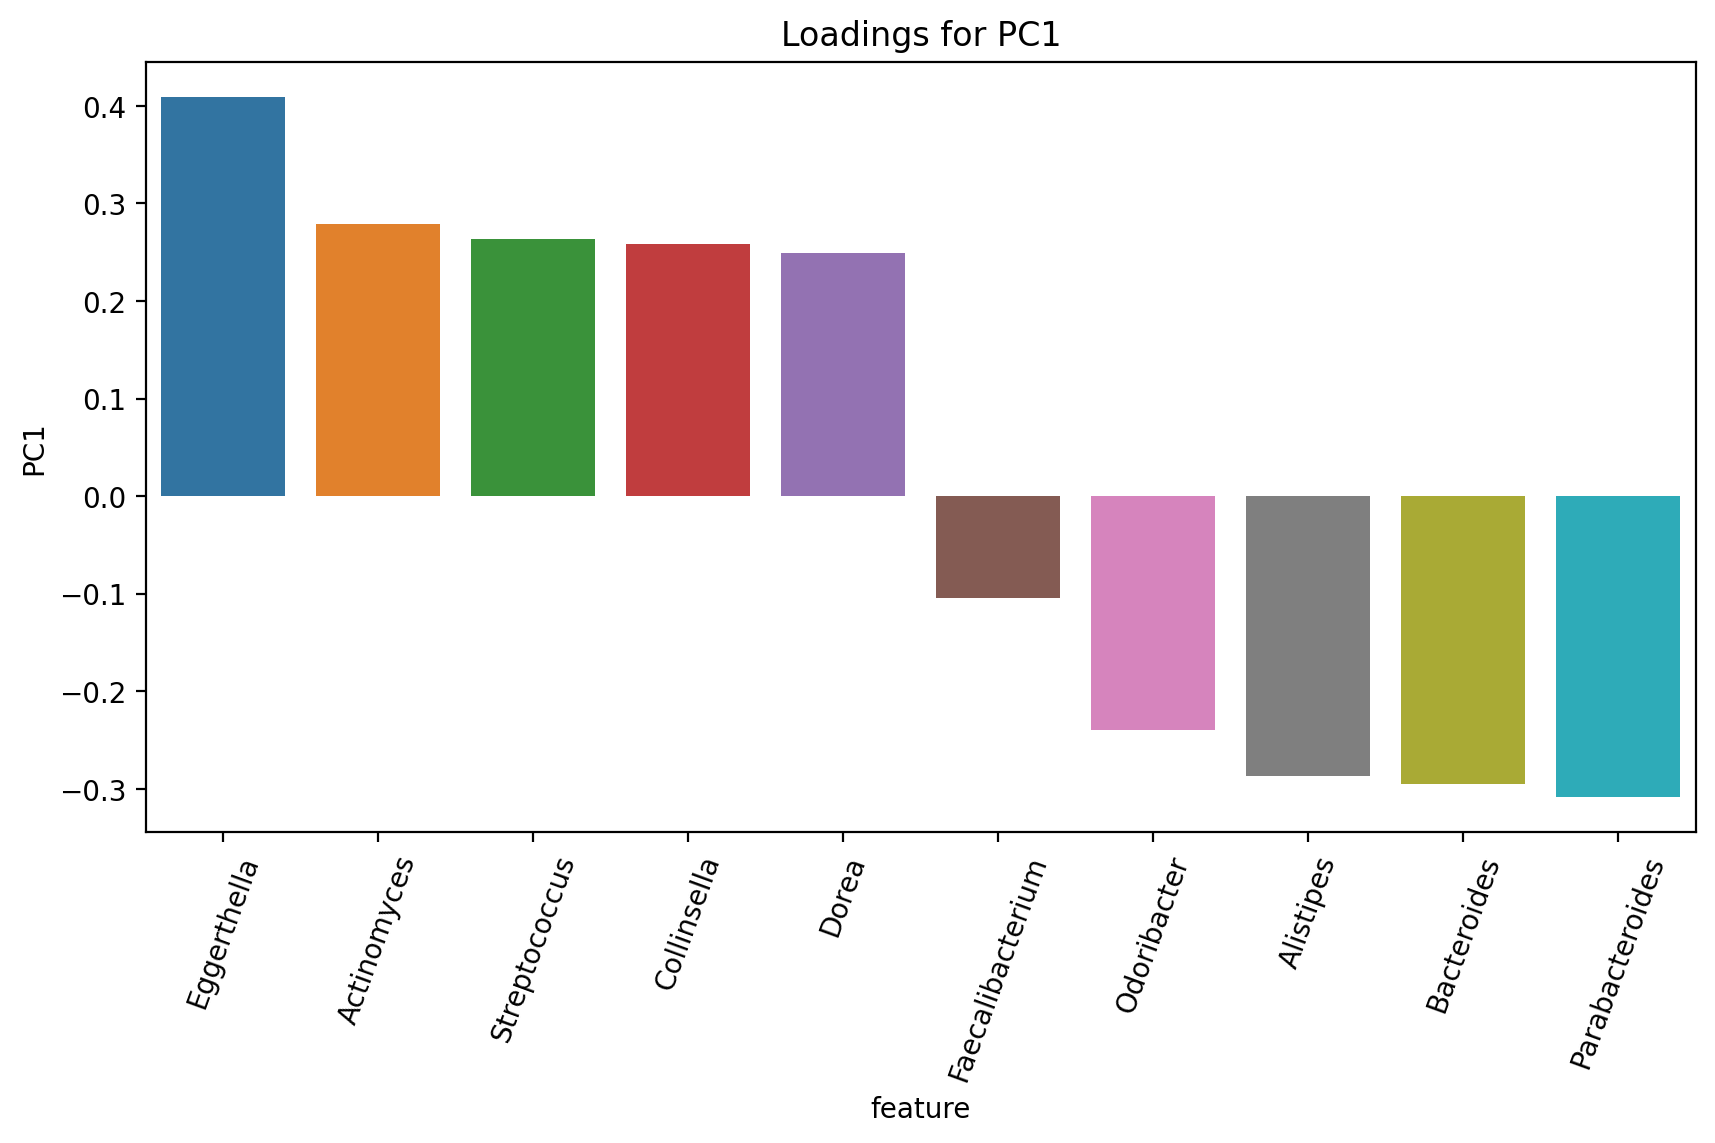

In [127]:
pcs = pca.components_
# create a dataframe with the load of the features in PC1:
load = pd.DataFrame(np.transpose(pcs), columns=['PC'+str(i+1) for i in range(len(columns_list))])
load["feature"] = list(data.columns)

# descending values
load1 = load.sort_values('PC1', ascending=False)
load1_feat = pd.DataFrame(load1[["feature", 'PC1']], columns=['feature', 'PC1']) # for reference

# only keep the big contributors
load1_out = pd.concat([load1_feat[:5], load1_feat[-5:]], ignore_index=True)

# plot
plt.figure(dpi=200, figsize=(10,5))
sns.barplot(load1_out, x='feature', y='PC1')
plt.xticks(rotation=70);
plt.title("Loadings for PC1");
plt.savefig('../Figures/PCA_loadings_PC1_pooled.svg', bbox_inches = "tight")

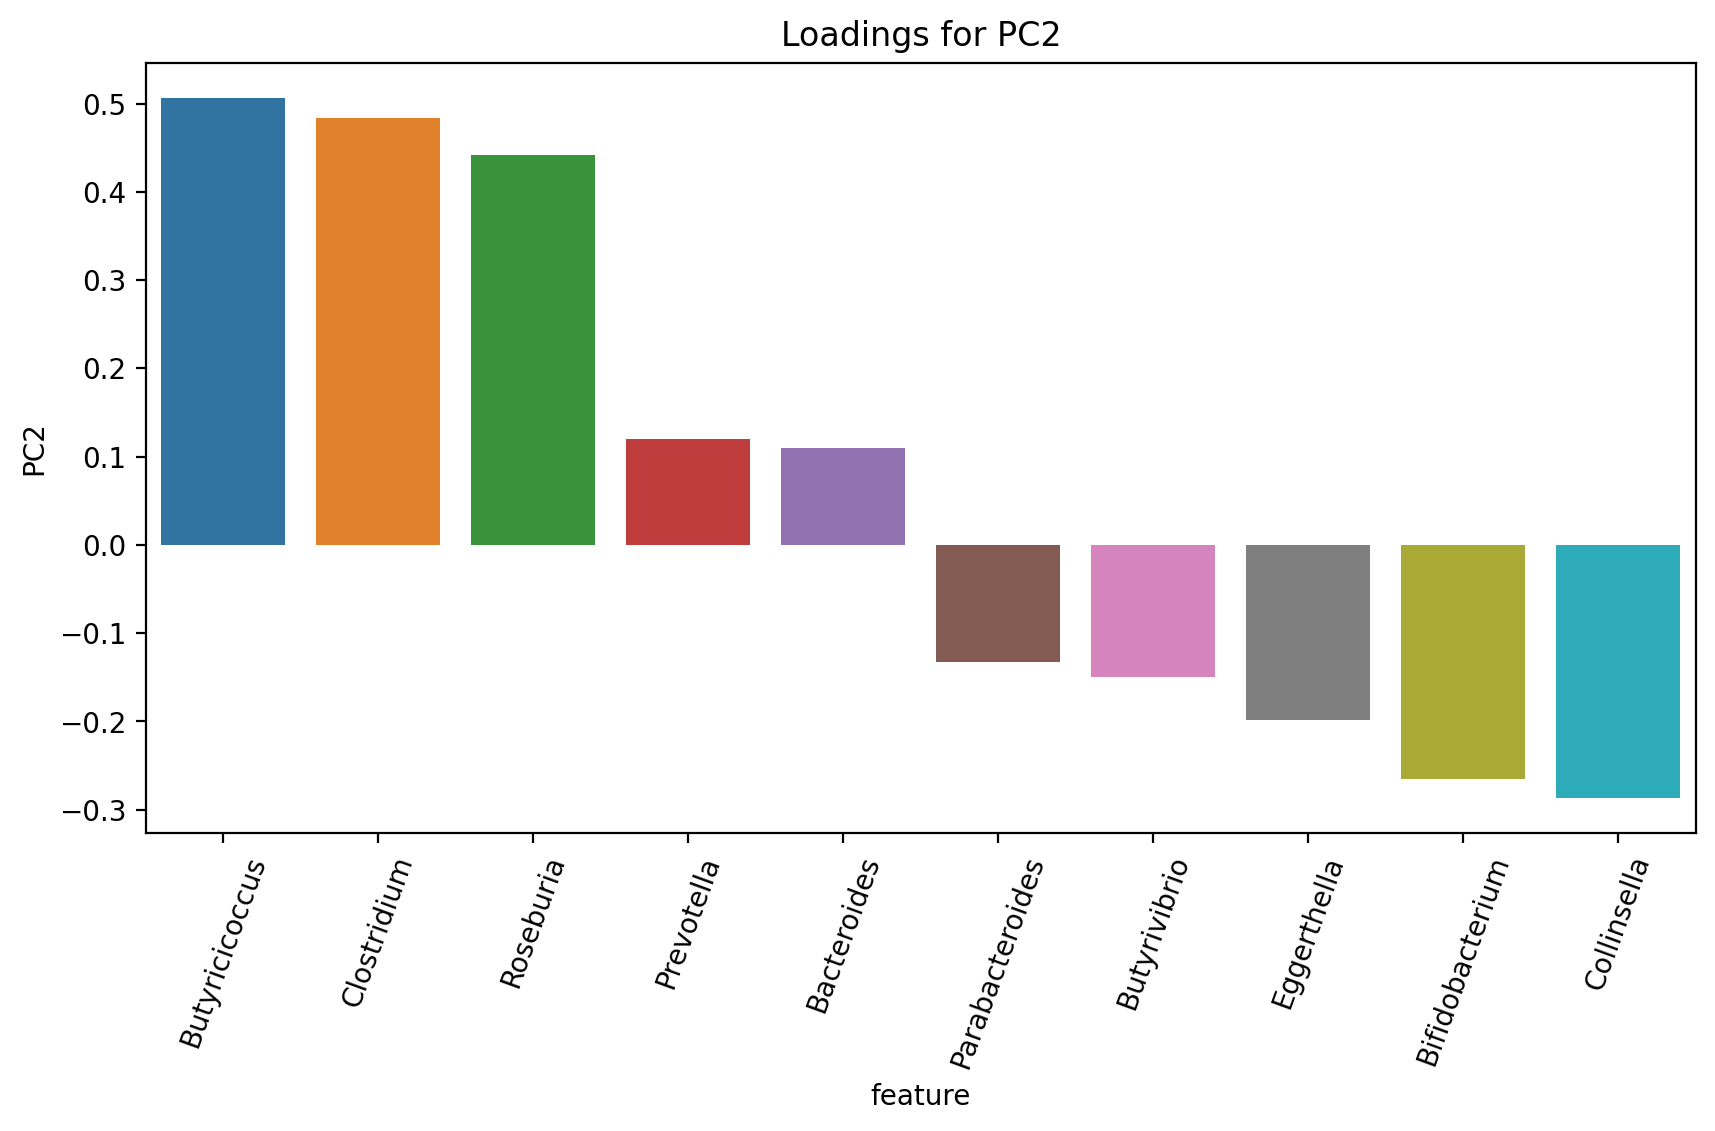

In [128]:
pcs = pca.components_
# create a dataframe with the load of the features in PC1:
load2 = pd.DataFrame(np.transpose(pcs), columns=['PC'+str(i+1) for i in range(len(columns_list))])
load2["feature"] = list(data.columns)

# descending values
load2 = load.sort_values('PC2', ascending=False)
load2_feat = pd.DataFrame(load2[["feature", 'PC2']], columns=['feature', 'PC2']) # for reference

# only keep the big contributors
load2_out = pd.concat([load2_feat[:5], load2_feat[-5:]], ignore_index=True)

# plot
plt.figure(dpi=200, figsize=(10,5))
sns.barplot(load2_out, x='feature', y='PC2')
plt.xticks(rotation=70);
plt.title("Loadings for PC2");
plt.savefig('../Figures/PCA_loadings_PC2_pooled.svg', bbox_inches = "tight")

**Visualize clustering by diagnosis with first two PCs:**

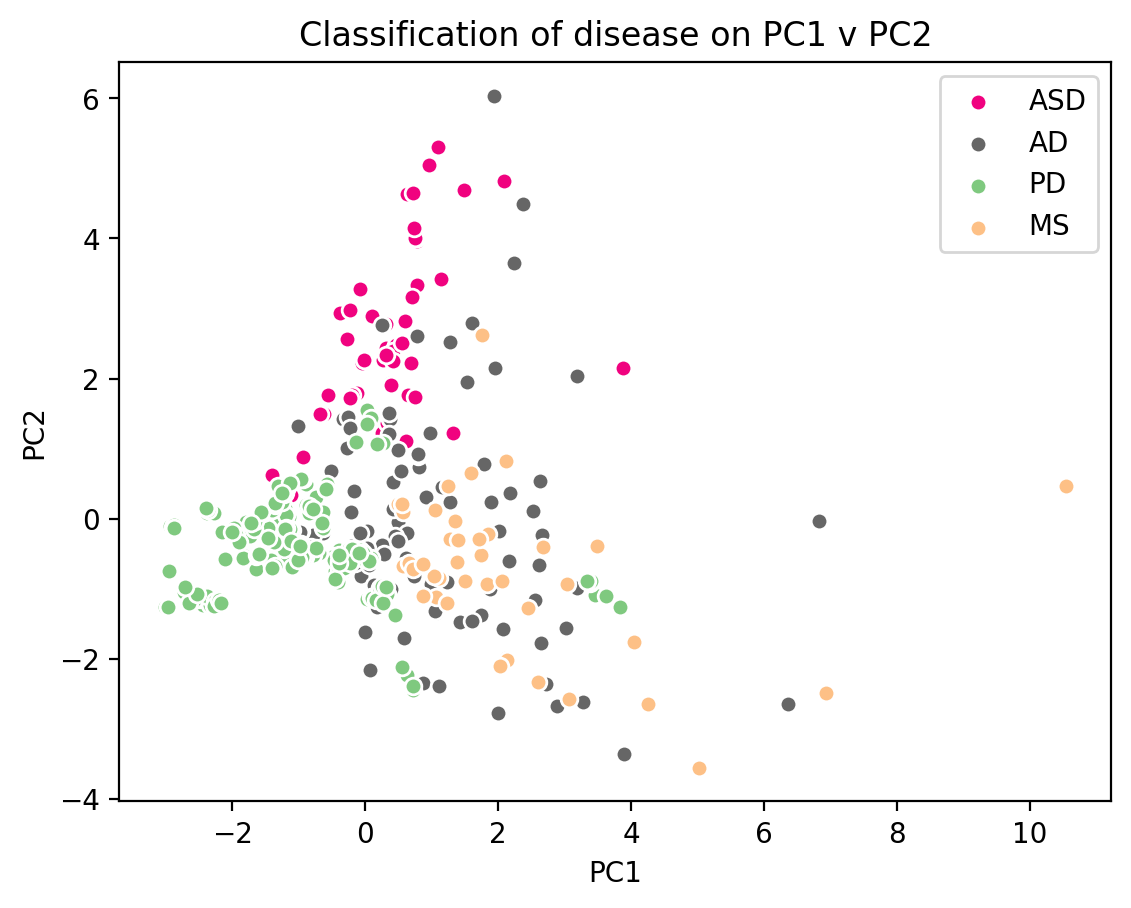

In [129]:
pcs = pca.components_

# set up lists of diagnosis indices:
ASD = []
AD = []
PD = []
Epilepsy = []
MS = []

diagnosis = list(diagnosis)

# indicate which sample indices are which disease:
for i in range(len(diagnosis)):
    if diagnosis[i]=='ASD':
        ASD.append(i)
    if diagnosis[i]=='AD':
        AD.append(i)
    if diagnosis[i]=='PD':
        PD.append(i)
    if diagnosis[i]=='MS':
        MS.append(i)

# plot PC1 v PC2, indicating which indices of these are which disease:
plt.figure(dpi=200)

plt.scatter(out_df['PC1'][ASD], out_df['PC2'][ASD], label='ASD', color = color_map['ASD'], edgecolor='white')
plt.scatter(out_df['PC1'][AD], out_df['PC2'][AD], label='AD', color = color_map['AD'], edgecolor='white')
plt.scatter(out_df['PC1'][PD], out_df['PC2'][PD], label='PD', color = color_map['PD'], edgecolor='white')
plt.scatter(out_df['PC1'][MS], out_df['PC2'][MS], label='MS', color = color_map['MS'],edgecolor='white')

plt.legend();
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.xlim(-11,11)
# plt.ylim(-11,11)
plt.title("Classification of disease on PC1 v PC2");
plt.savefig('../Figures/PCA_plot_pooled.svg')

## Biplot

<Figure size 2560x1920 with 0 Axes>

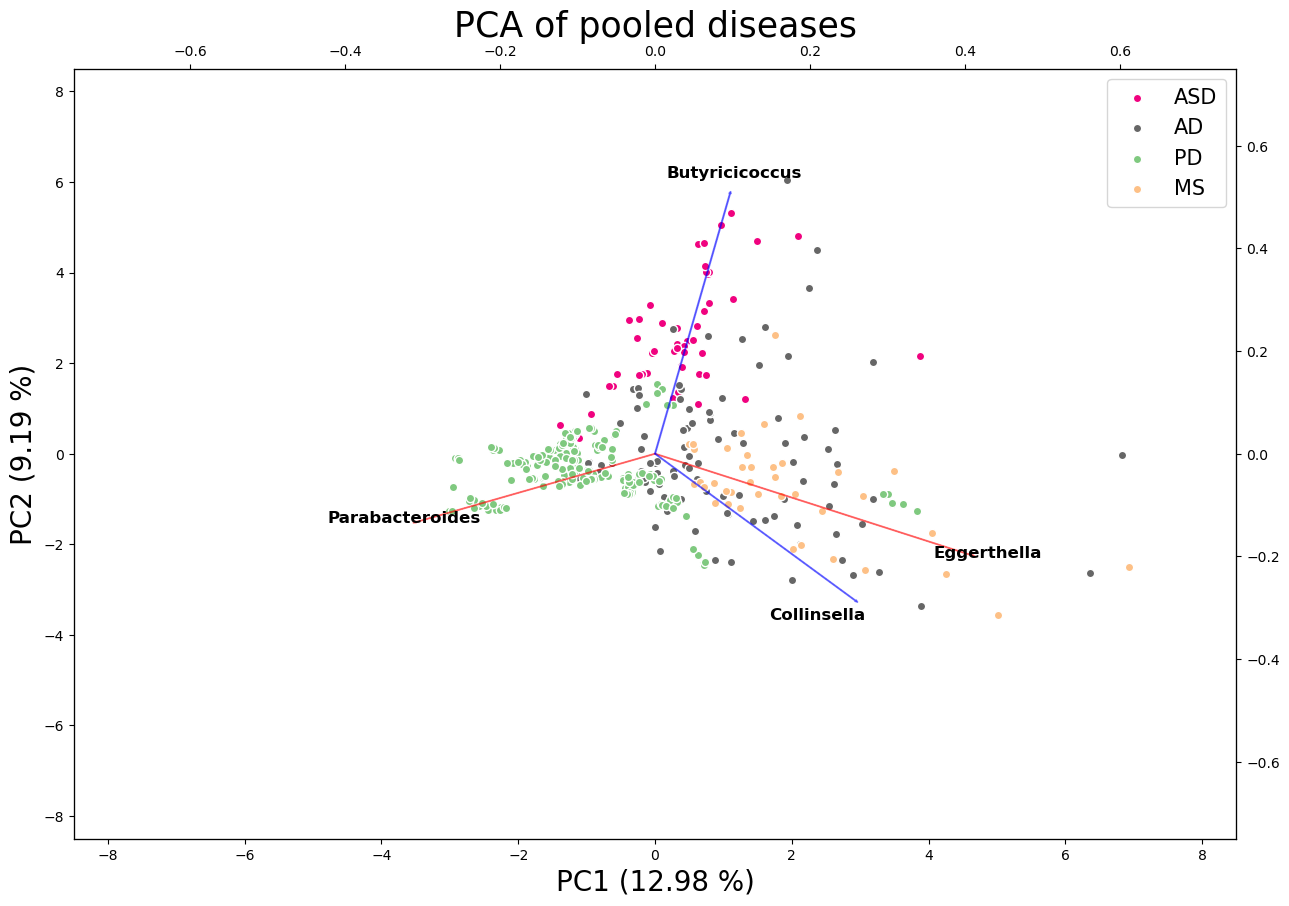

In [130]:
pcs = pca.components_

# set up lists of diagnosis indices:
ASD = []
AD = []
PD = []
Epilepsy = []
MS = []

diagnosis = list(diagnosis)

# indicate which sample indices are which disease:
for i in range(len(diagnosis)):
    if diagnosis[i]=='ASD':
        ASD.append(i)
    if diagnosis[i]=='AD':
        AD.append(i)
    if diagnosis[i]=='PD':
        PD.append(i)
    if diagnosis[i]=='MS':
        MS.append(i)

# plot PC1 v PC2, indicating which indices of these are which disease:
plt.figure(dpi=400)
fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.scatter(out_df['PC1'][ASD], out_df['PC2'][ASD], label='ASD', color = color_map['ASD'], edgecolor='white')
ax.scatter(out_df['PC1'][AD], out_df['PC2'][AD], label='AD', color = color_map['AD'], edgecolor='white')
ax.scatter(out_df['PC1'][PD], out_df['PC2'][PD], label='PD', color = color_map['PD'], edgecolor='white')
ax.scatter(out_df['PC1'][MS], out_df['PC2'][MS], label='MS', color = color_map['MS'],edgecolor='white')

biplot(out_df, loadings_pool, ax)

ax.legend(fontsize=15);
ax.set_xlabel("PC1 ({:.2f} %)".format(var_ratio[0] * 100), fontsize=20)
ax.set_ylabel("PC2 ({:.2f} %)".format(var_ratio[1] * 100), fontsize=20)
ax.set_xlim(-8.5,8.5)
ax.set_ylim(-8.5,8.5)
ax.set_title("PCA of pooled diseases", fontsize=25);

plt.savefig('../Figures/PCA_biplot_pooled.svg')

## RF Classifier

In [131]:
# set up classifier
rf = RandomForestClassifier(n_estimators=100) # 100 trees in the forest.
# 100 trees means 100 sub-samples of data

# make training and testing sets:
feat_train, feat_test, diag_train, diag_test = sk.model_selection.train_test_split(data, diagnosis, test_size=0.70)
# chose a test size of 30%

# train:
out = rf.fit(feat_train, diag_train)
perm_importance = permutation_importance(rf, feat_test, diag_test, n_repeats=100)

# test:
diag_predict = rf.predict(feat_test)

**Accuracy of classifier**

In [132]:
acc = sk.metrics.accuracy_score(diag_test, diag_predict)
print("accuracy of the classifier: {}".format(acc))

accuracy of the classifier: 0.8804347826086957


**Table of importances**

In [133]:
feat = data.columns

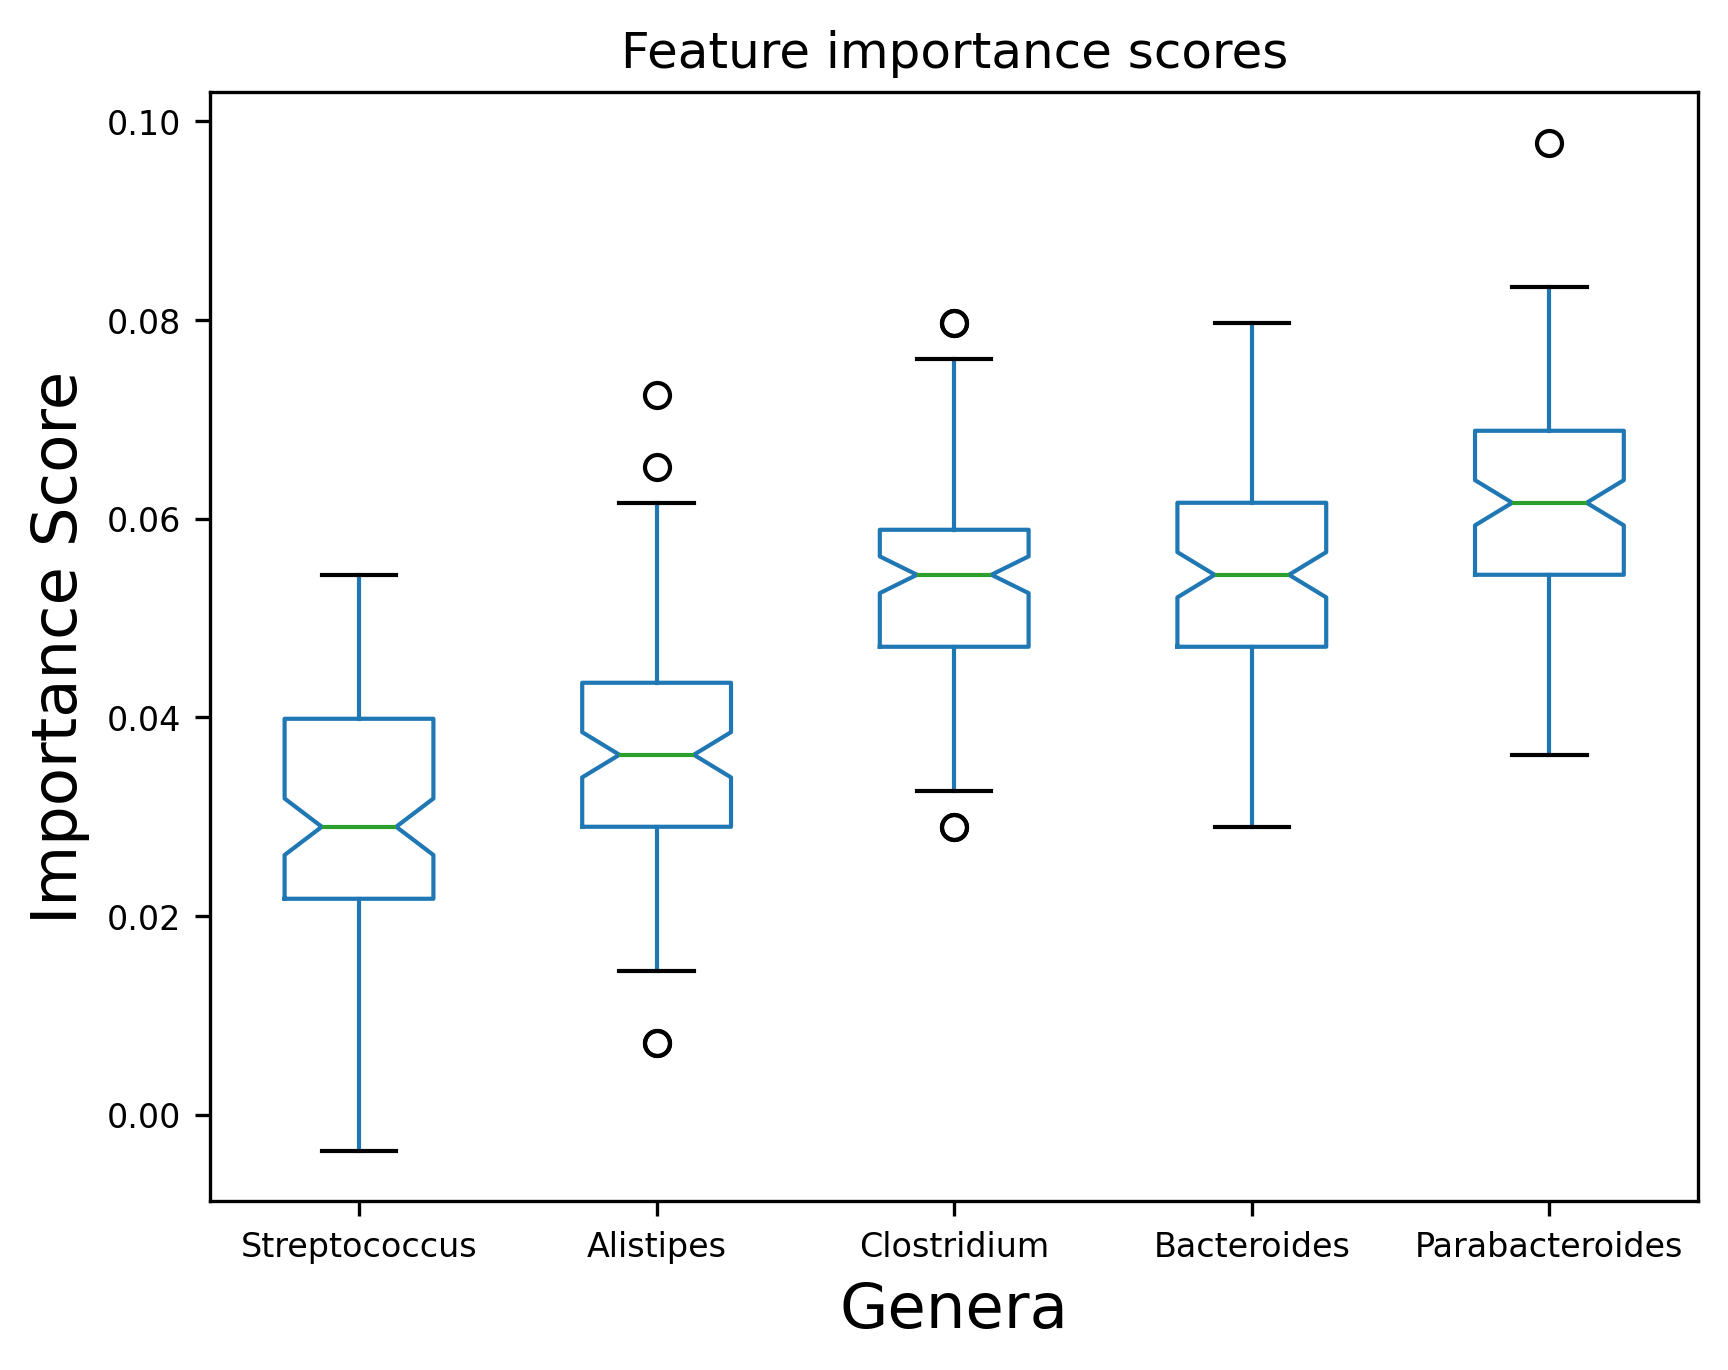

In [134]:
sorted_idx = perm_importance.importances_mean.argsort()
imp_data=pd.DataFrame(perm_importance.importances[sorted_idx].transpose(), columns=data.columns[sorted_idx])

plt.figure(dpi = 300)

imp_data.boxplot(list(imp_data.columns[-5:]), grid=False, meanline=True, fontsize=8, notch=True)
plt.xlabel(xlabel="Genera", fontsize=15)
plt.ylabel(ylabel="Importance Score", fontsize=15)
plt.title("Feature importance scores");
plt.savefig('../Figures/RF_importance_pooled.svg')

In [135]:
# find importance of each feature:
feat_importance = rf.feature_importances_

# make and print table of ranked features by importance:
imp_table = pd.DataFrame(feat, columns=['features'])
imp_table['importance'] = feat_importance
imp_table_sort = imp_table.sort_values('importance', ascending=False)
imp_table_sort = imp_table_sort.round(3)
feat_sort = list(imp_table_sort['features']) # use this for plotting and storing the features
imp_table_sort.head()

,features,importance
20,Parabacteroides,0.146
4,Clostridium,0.141
0,Alistipes,0.136
1,Bacteroides,0.093
3,Butyricicoccus,0.061


**XY scatter of important features**

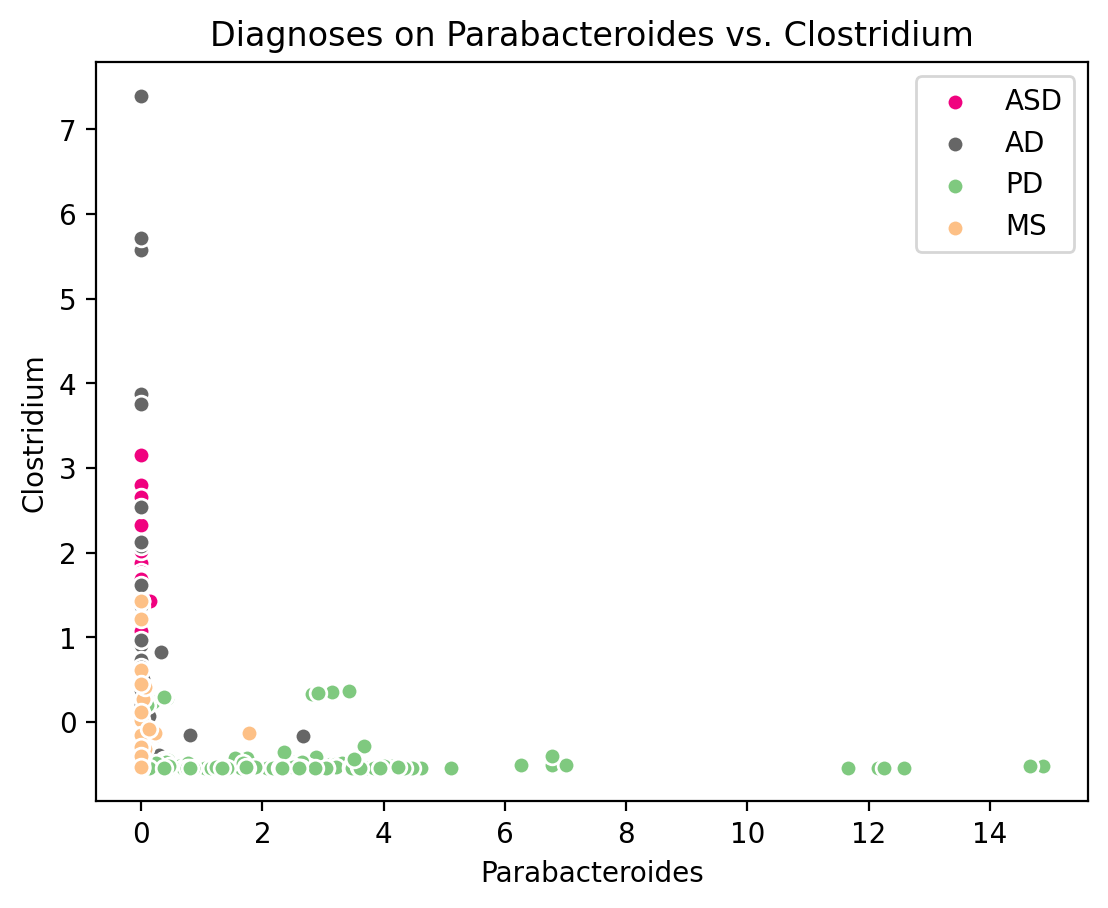

In [136]:
# use the top two most important features from the table of ranked importances
plt.figure(dpi=200)
plt.scatter(df[feat_sort[0]][ASD], data[feat_sort[1]][ASD], label='ASD', color = color_map['ASD'], edgecolor='white')
plt.scatter(df[feat_sort[0]][AD], data[feat_sort[1]][AD], label='AD', color = color_map['AD'], edgecolor='white')
plt.scatter(df[feat_sort[0]][PD], data[feat_sort[1]][PD], label='PD', color = color_map['PD'], edgecolor='white')
plt.scatter(df[feat_sort[0]][MS], data[feat_sort[1]][MS], label='MS', color = color_map['MS'], edgecolor='white')

plt.legend()

plt.xlabel(feat_sort[0]);
plt.ylabel(feat_sort[1]);
plt.title("Diagnoses on " + str(feat_sort[0]) + ' vs. ' + str(feat_sort[1]));
plt.savefig('../Figures/RF_feature_plot_pooled.svg')

**Look at Gini importance and get decision tree**

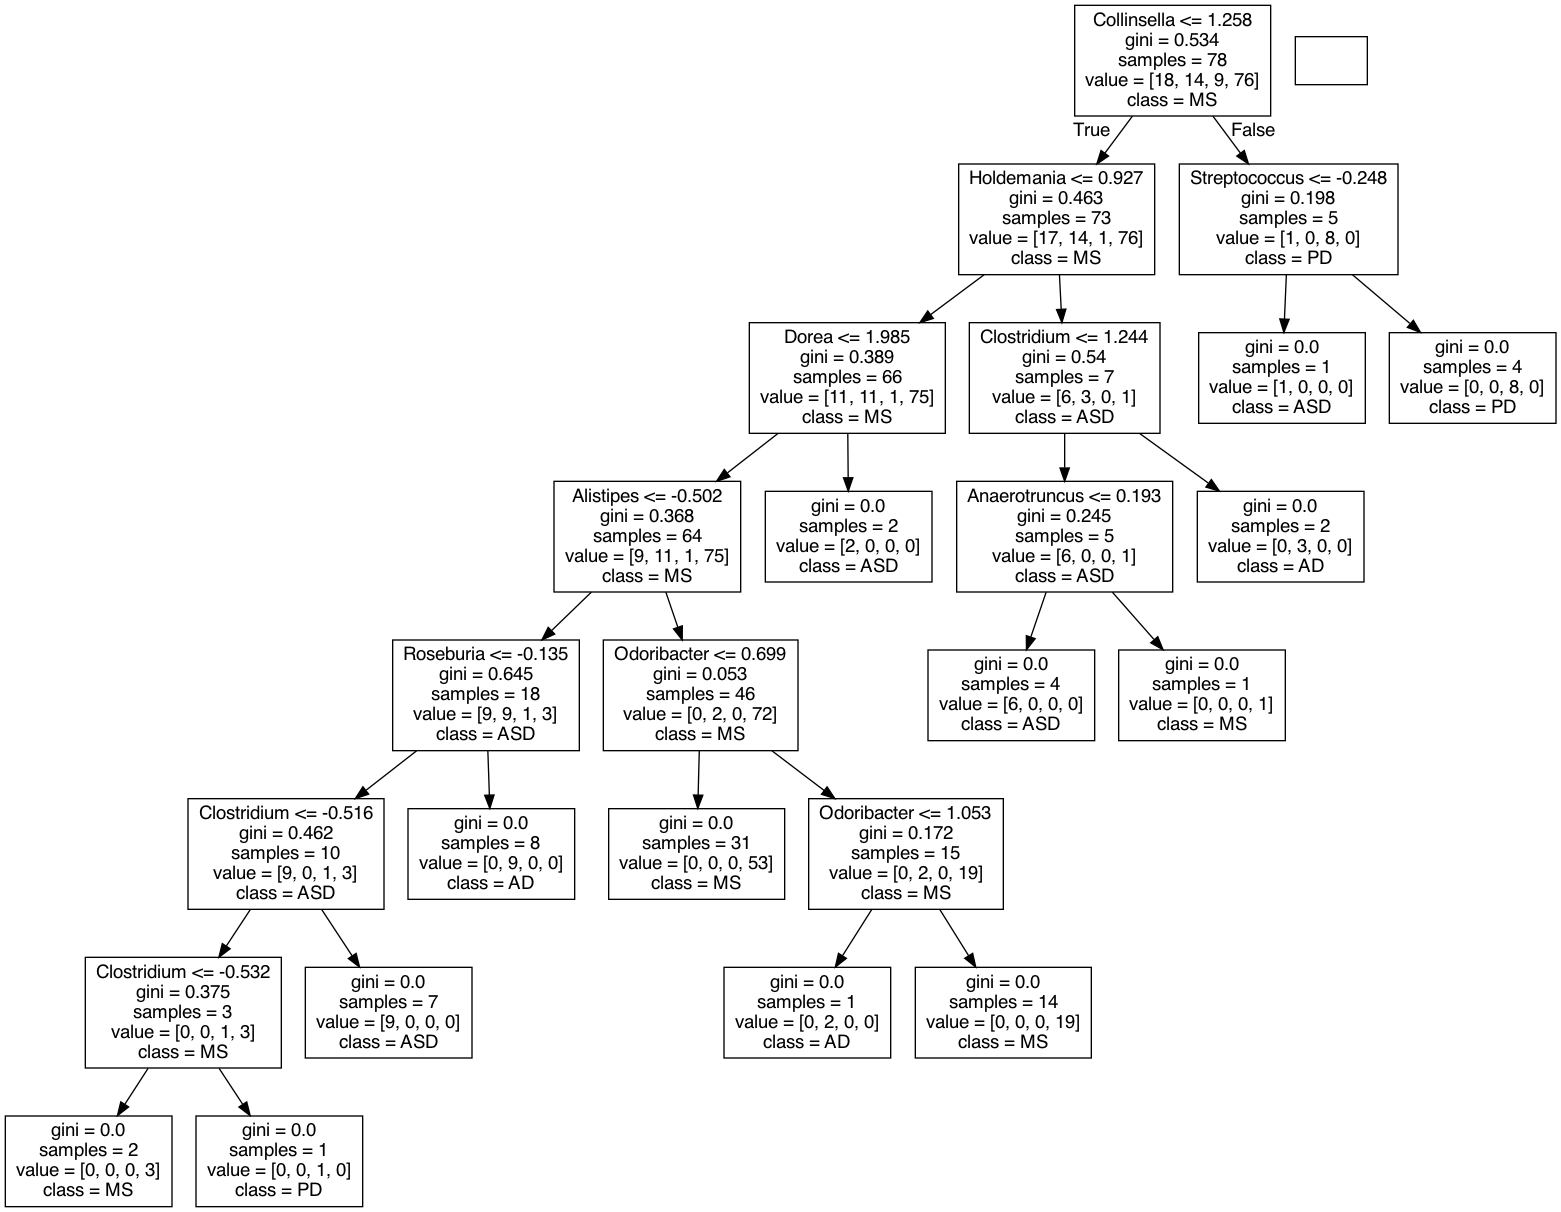

In [137]:
# followed this tutorial for getting image: https://naysan.ca/2019/11/26/visualize-a-decision-tree-with-sklearn/
# i just plotted one of the trees:
out_file = sk.tree.export_graphviz(out[0],label='all', feature_names=feat, class_names= ['ASD', 'AD', 'PD', 'MS'])

graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())